In [23]:
import scanpy as sc
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os

sc.set_figure_params(scanpy=True, dpi=80, dpi_save=1000)
                         
import mplscience

mplscience.available_styles()
mplscience.set_style(reset_current=True)
plt.rcParams['legend.scatterpoints'] = 1 

['default', 'despine']


In [2]:
output_dir = "/lustre/groups/ml01/workspace/moscot_paper/pancreas/EDA"

In [3]:
adata = sc.read_h5ad("/lustre/groups/ml01/workspace/moscot_paper/pancreas/pancreas_multiome_2022_processed.h5ad")

In [4]:
adata_2 = sc.read_h5ad("/lustre/groups/ml01/workspace/moscot_paper/pancreas/embeddings/pancreas_shared_embeddings.h5ad")

In [5]:
adata.obsm["X_multi_vi"] = adata_2.obsm["X_multi_vi"]

In [6]:
new_annotation = pd.read_csv("/lustre/groups/ml01/workspace/moscot_paper/pancreas/EDA/endocrine_refinement.csv")

In [7]:
adata.obs["Fev_delta_refinement"] = new_annotation["Fev_delta_refinement"].values
adata.obs["Ngn3_high_refinement"] = new_annotation["Ngn3_high_refinement"].values
adata.obs["refinement"] = new_annotation["refinement"].values

In [8]:
endocrine_celltypes = [
    "Ngn3 low",
    "Ngn3 high",
    "Ngn3 high cycling",
    "Fev+",
    "Fev+ Alpha",
    "Fev+ Beta",
    "Fev+ Delta",
    "Eps. progenitors",
    "Alpha",
    "Beta",
    "Delta",
    "Epsilon"
]

In [9]:
adata = adata[adata.obs["celltype"].isin(endocrine_celltypes)].copy()

In [10]:
sc.tl.umap(adata)

In [11]:
adata.obs['time'] = adata.obs.apply(lambda x: 14.5 if x["sample"]=="E14.5" else 15.5, axis=1)

In [12]:
color_dict = { 'Prlf. Ductal': '#f7b6d2', 'Ductal': '#d62728', 'Imm. Acinar': '#ffeb3b', 'Mat. Acinar': '#98df8a',
    'Alpha': '#1f77b4', 'Beta': '#ff7f0e', 'Delta': '#279e68', 'Eps. progenitors': '#aa40fc', 'Epsilon': '#8c564b',
       'Fev+': '#e377c2', 'Fev+ Alpha': '#b5bd61', 'Fev+ Beta': '#42f5ec', 'Fev+ Delta': '#aec7e8', 'Fev+ Delta,0': '#17becf', 'Fev+ Delta,1':'#98df8a',
    'Ngn3 high cycling': '#adf542',
        'Ngn3 high,0': '#ff9896', 'Ngn3 high': '#ff9896', 'Ngn3 high,1':'#f0b98d', 'Ngn3 low': '#c5b0d5'
}

In [13]:
adata.obs["refinement"] = adata.obs["refinement"].astype("category")
adata.uns["refinement_colors"] = [color_dict[ct] for ct in adata.obs["refinement"].cat.categories]

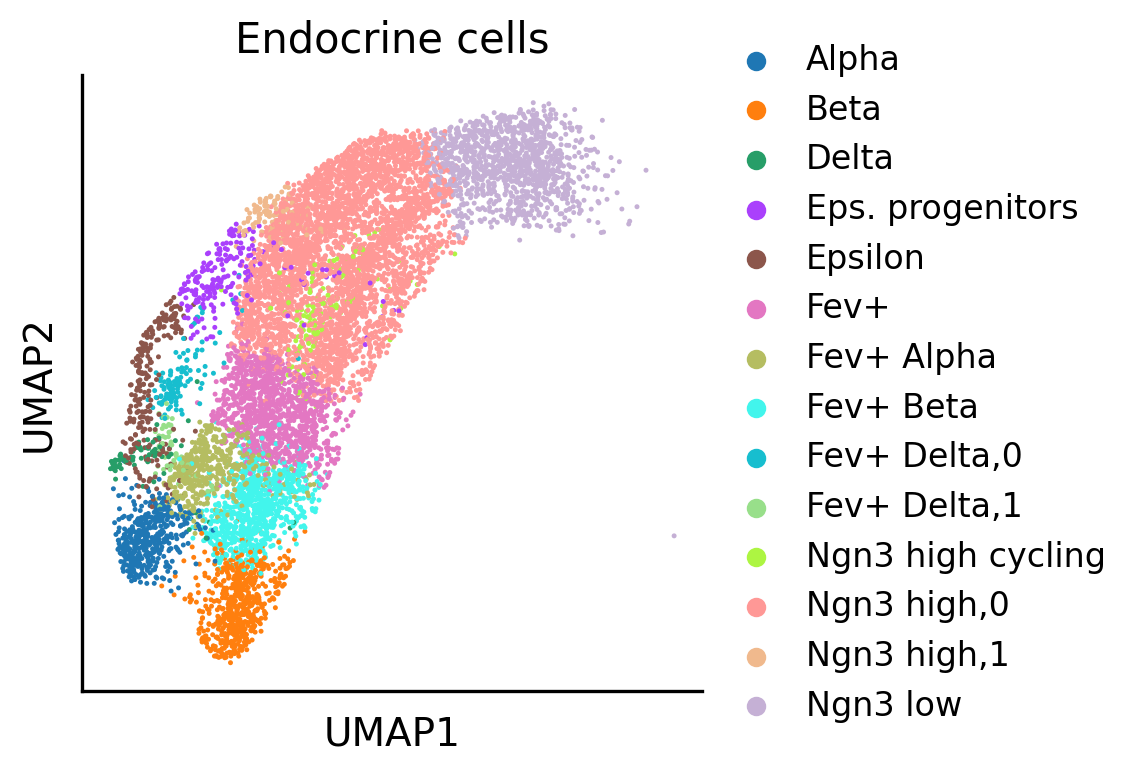

In [24]:
fig = sc.pl.umap(adata, color="refinement", show=True, return_fig=True, title="Endocrine cells", save=os.path.join(output_dir, 'endocrine_refinement_reduced.png'))
fig

In [25]:
fig.figure.savefig(os.path.join(output_dir, 'endocrine_refinement_reduced.png'), dpi=2000)

In [16]:
colors_to_drop = ["Alpha", "Beta", "Epsilon", "Delta", "Fev+", "Fev+ Alpha", "Fev+ Beta", "Ngn3 high cycling", "Ngn3 low", "Eps. progenitors"]
adata.obs["refinement_new"] = adata.obs.apply(lambda x: np.nan if x["refinement"] in colors_to_drop else x["refinement"], axis=1).astype("category")


In [17]:
adata.uns["refinement_new_colors"] = [color_dict[ct] for ct in adata.obs["refinement_new"].cat.categories]

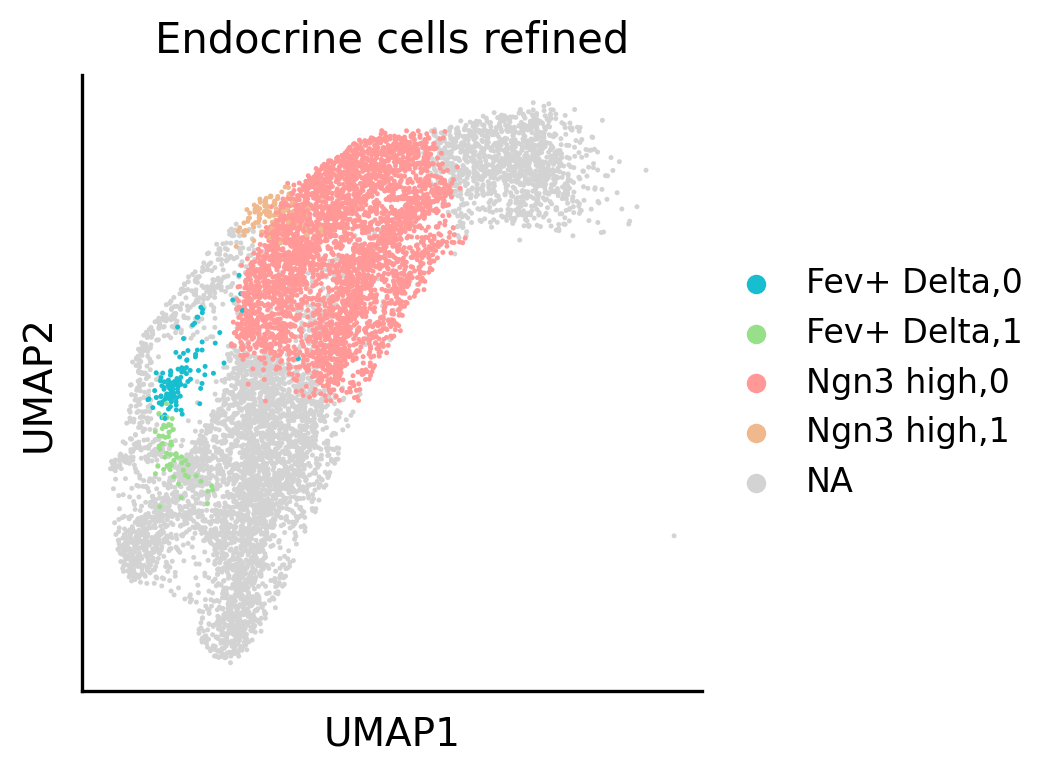

In [18]:
fig = sc.pl.umap(adata, color="refinement_new", show=True, return_fig=True, title="Endocrine cells refined")
fig

In [19]:
fig.figure.savefig(os.path.join(output_dir, 'endocrine_refinement_reduced_na.png'))

In [20]:
label_params = fig.axes[0].get_legend_handles_labels() 
figl, axl = plt.subplots()
axl.axis(False)
axl.legend(*label_params, fontsize=5, loc="center", markerscale=2, bbox_to_anchor=(0.5, 0.5), prop={"size":10})

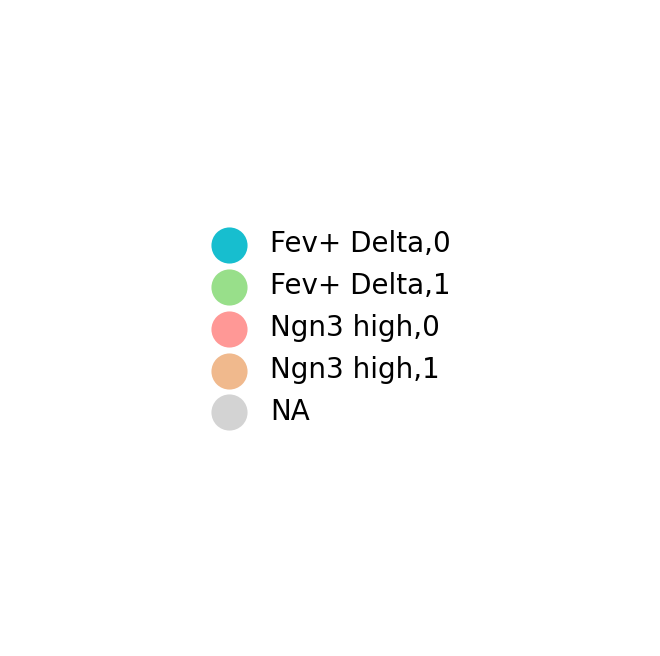

In [21]:
axl.figure

In [22]:
axl.figure.savefig(os.path.join(output_dir, 'endocrine_refinement_reduced_legend_only.png'))